In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('california_housing_train.csv')


In [8]:
df.dropna(inplace=True)

In [9]:
xpoints = df["longitude"].values.reshape(-1, 1)
ypoints = df["population"].values


In [10]:
ypoints_binary = (ypoints > ypoints.mean()).astype(int)
x_train, x_test, y_train, y_test = train_test_split(xpoints, ypoints_binary, test_size=0.1, random_state=42)

In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [13]:
ypoints_pred = log_reg.predict(x_test_scaled)


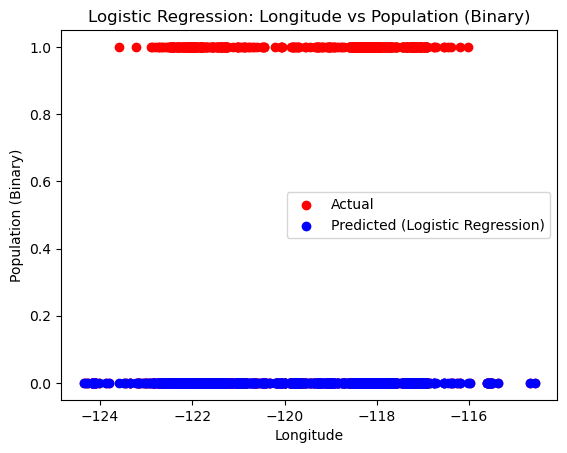

In [14]:
plt.scatter(x_test, y_test, color="red", label="Actual")
plt.scatter(x_test, ypoints_pred, color="blue", label="Predicted (Logistic Regression)")
plt.xlabel("Longitude")
plt.ylabel("Population (Binary)")
plt.title("Logistic Regression: Longitude vs Population (Binary)")
plt.legend()
plt.show()